<a href="https://colab.research.google.com/github/Likhi-tech/Deep-learning-projects/blob/main/time_series_analysis_for_house_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

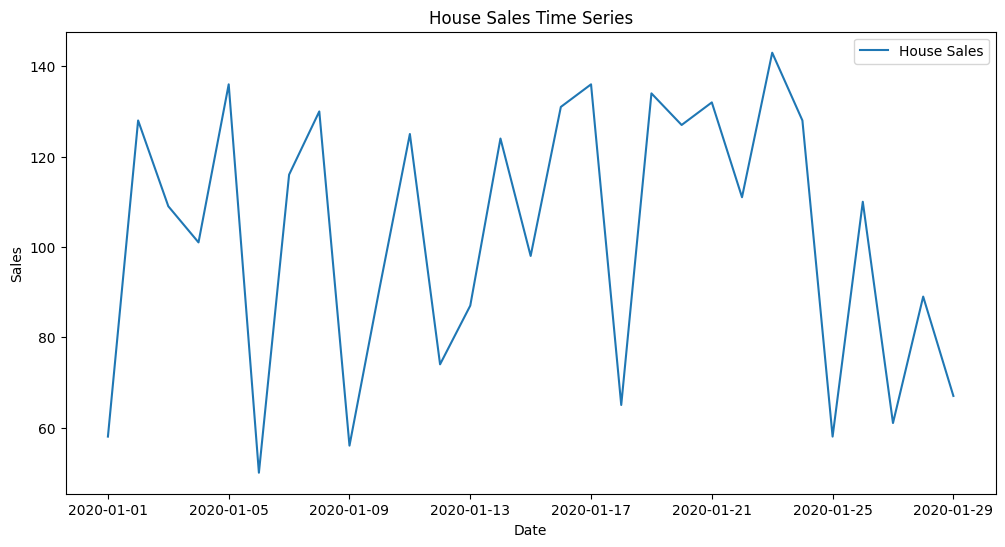

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Load your house sales data (replace 'data.csv' with your dataset)
data = pd.read_csv('house_sales_data.csv')
# Convert the date column to datetime, specifying the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Assuming day-month-year format
# Set the Date column as the index (assuming it's not already)
data.set_index('Date', inplace=True)
# Visualize your data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='House Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('House Sales Time Series')
plt.legend()
plt.show()

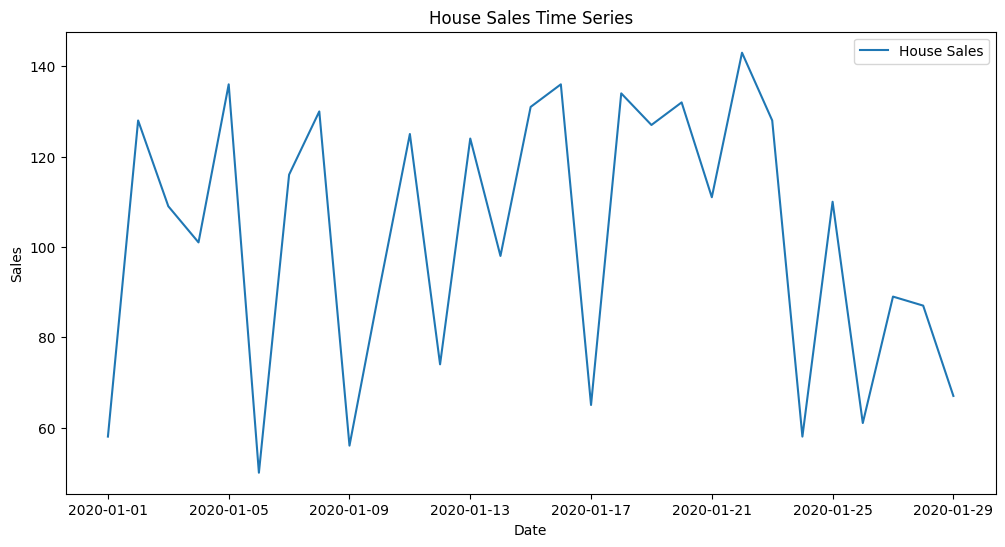

ADF Statistic: -2.7677457604706968
p-value: 0.06303080486232071
Critical Values:
 1%: -3.8326031418574136
 5%: -3.0312271701414204
 10%: -2.655519584487535
ADF Statistic: -9.054944891931726
p-value: 4.729187399427404e-15
Critical Values:
 1%: -3.7112123008648155
 5%: -2.981246804733728
 10%: -2.6300945562130176


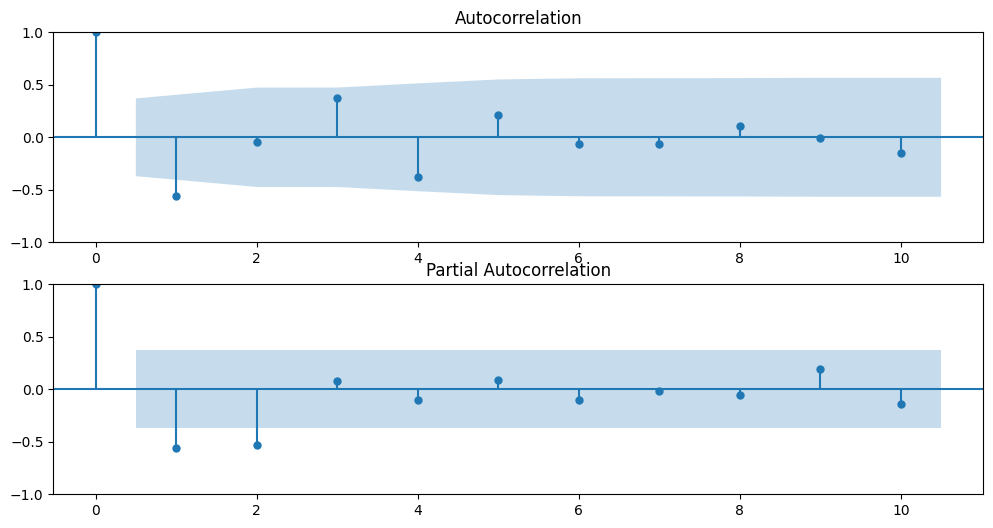

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your house sales data (replace 'data.csv' with your dataset)
data = pd.read_csv('house_sales_data.csv')

# Convert the date column to datetime, specifying the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Assuming day-month-year format

# Set the Date column as the index (assuming it's not already)
data.set_index('Date', inplace=True)

# Visualize your data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='House Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('House Sales Time Series')
plt.legend()
plt.show()

# Check for stationarity using Dickey-Fuller test
def test_stationarity(timeseries):
    # Drop missing values before performing the test
    timeseries = timeseries.dropna()  # Add this line to handle missing data
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')

# Perform Dickey-Fuller test on the sales data
test_stationarity(data['Sales'])

# If the data is not stationary, apply differencing to make it stationary
data['Sales_diff'] = data['Sales'] - data['Sales'].shift(1)
data.dropna(inplace=True)

# Perform Dickey-Fuller test again on the differenced data
test_stationarity(data['Sales_diff'])

# Plot ACF and PACF to determine the order (p, d, q) of the ARIMA model
plt.figure(figsize=(12, 6))
plt.subplot(211)
# Adjust the number of lags to be less than or equal to the length of the differenced series
plot_acf(data['Sales_diff'], ax=plt.gca(), lags=min(len(data['Sales_diff']) - 1, 10)) # Limit lags to a reasonable number
plt.subplot(212)
plot_pacf(data['Sales_diff'], ax=plt.gca(), lags=min(len(data['Sales_diff']) - 1, 10)) # Limit lags to a reasonable number
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -130.360
Date:                Wed, 21 Aug 2024   AIC                            266.721
Time:                        15:06:21   BIC                            270.608
Sample:                    01-02-2020   HQIC                           267.877
                         - 01-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3417      0.281     -1.217      0.223      -0.892       0.208
ma.L1         -0.6466      0.216     -2.992      0.003      -1.070      -0.223
sigma2       879.4223    322.387      2.728      0.0

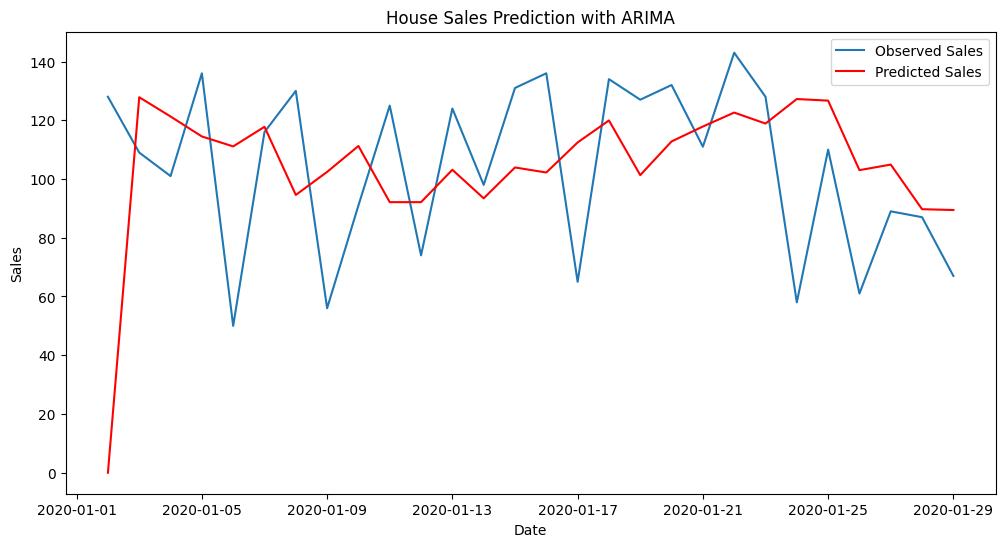

In [12]:
# Based on the ACF and PACF plots, choose the order (p, d, q)
p, d, q = 1, 1, 1
19
# Fit the ARIMA model
model = ARIMA(data['Sales'], order=(p, d, q))
results = model.fit()
# Print the model summary
print(results.summary())
# Plot the predicted vs. actual sales values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Observed Sales')
plt.plot(data.index, results.fittedvalues, color='red', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('House Sales Prediction with ARIMA')
plt.legend()
plt.show()